**Table of contents**<a id='toc0_'></a>    
- [회귀분석](#toc1_)    
  - [선형회귀](#toc1_1_)    
    - [단순선형회귀](#toc1_1_1_)    
    - [다중선형회귀](#toc1_1_2_)    
      - [영향치 판단](#toc1_1_2_1_)    
      - [VIF 계산](#toc1_1_2_2_)    
      - [변수선택과 가능도](#toc1_1_2_3_)    
      - [잔차 분석](#toc1_1_2_4_)    
    - [규제 선형회귀 (Regularized linear regression)](#toc1_1_3_)    
      - [릿지 회귀 (L2. 제곱합 규제)](#toc1_1_3_1_)    
      - [라쏘 회귀 (L1. 절대값 규제)](#toc1_1_3_2_)    
      - [엘라스틱 넷](#toc1_1_3_3_)    
    - [일반화 선형회귀](#toc1_1_4_)    
      - [로지스틱 회귀](#toc1_1_4_1_)    
  - [비선형 회귀](#toc1_2_)    
    - [다항 회귀](#toc1_2_1_)    
    - [스플라인 회귀](#toc1_2_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[회귀분석](#toc0_)

## <a id='toc1_1_'></a>[선형회귀](#toc0_)

- 용어설명
   - X : 예측변수 = 설명변수 = 입력변수 = 독립변수 = feature
   - Y : 결과변수 = 반응변수 = 출력변수 = 종속변수 = target
   - Y hat : 적합값 = 예측값 = predicted value
   - w : 회귀계수 = 기울기 = 가중치 = coefficient
   - b : 회귀계수 = 절편 = 상수항 = intercept = constant
   - 잔차 (Residual) : 관측치와 표본회귀선과의 편차
   - 오차 (Error) : 관측치와 모회귀선과의 편차
- 선형회귀의 가정
   - 선형성 : 독립변수와 종속변수의 관계는 선형성을 갖는다. 종속변수는 독립변수와 회귀계수의 선형결합으로 표현된다. 
   - 독립성
      - 잔차들은 서로 독립이다. 잔차들이 자기 상관을 갖는다면 주요 독립변수를 놓친 것.
      - 독립변수들은 서로 독립이다. 서로 독립이 아니라면 다중공선성의 문제가 있는 것. 다중선형회귀의 중요 가정.
   - 등분산성 : 잔차의 분산은 일정하다. (분산이 체계적으로 줄거나 늘거나하는 등의 경향을 갖지 않는다.)
   - 정규성 : 잔차는 정규분포의 형태를 띈다.
- 회귀분석의 전처리
   - 다중선형회귀에서 원핫인코딩하는 경우 다중공선성 문제가 생긴다. (하나가 1이면 다른 것들은 0)
   - 서열척도의 경우 순서에 따른 수치형 변수로 변환
   - 독립변수의 중요도, 즉 회귀결과에 대한 영향력의 크기는 Leverage H, Cook's distance, DFBETAS, DFFITS 등을 사용한다.
   - 다중공선성의 문제가 있는 경우, 회귀계수의 분산이 비정상적으로 커짐. 변수선택법, 분산팽창요인(VIF, Variation inflation factor) 등 사용하여 변수 제거
   - 잔차분석 결과가 등분산성, 정규성 가정을 위반하는 경우 종속변수에 대해 Box-Cox변환, 로그변환 등을 시도할 수 있다.
- R2 (R squared)의 의미
   - SST (Totoal Sum of Squares) : Y - Ym = 관측치의 분산
   - SSR (Sum of Squares of Regression) : Yh - Ym = 예측치의 분산
   - SSE (Sum of Squares of Error) : Y - Yh = 예측치의 오차
   - SST(Y-Ym) = SSR(Yh-Ym) + SSE(Y-Yh) 이 된다.
   - 좋은 추정이라는 것은 결국 SSE를 최소화, 즉 예측치의 분산이 관측치의 분산을 모두 설명해줄 수 있어야 한다는 것이다.
   - 따라서 R2 = 관측치 분산 대비 예측치 분산 = SSR/SST가 되고, 1에 가까울수록 적합도가 좋다는 의미가 된다.
   - 데이터 분석 상황에서 목표로 한 것은 관측치와 최대한 동일한 예측을 하는 것이고, 이 관점에서는 SST는 볼 필요가 없다. SSE만 0이 되면 되는 것이다.
   - 통계적 분석 관점에서 볼 때 SSE가 0이 된다는 것은 과대적합이다. 주어진 관측치 조차도 표본일 뿐이어서 SSE가 0인 것은 의미가 없다.
   - 따라서 분산이 일치하는지도 중요한 정보가 될 수 있고, 이 관점에서 추정의 적합도를 보는 척도가 R2이다. 
   - 다만 R2의 문제는 적합한 추정이 아니어도 분산만 같으면 높은 점수가 나온다는 데 있다. 
- 잔차 (https://blog.naver.com/yunjh7024/220883990761)
   - 잔차 : 관측치, 예측치 간 오차
   - SSE : 잔차의 제곱합
   - 잔차의 분산 : SSE를 자유도로 나눈 것 (MSE)
   - 잔차의 표준편차 : 표준오차. SE(Standard Error) (MSE 제곱근) 
- 회귀계수의 가설검정 (https://blog.naver.com/kisooofficial/223189457022)
   - 최소제곱법의 수식은 결국 잔차제곱합을 최소화해주는 회귀계수를 찾기 위해, 잔차제곱합 수식을 회귀계수에 대해 편미분한 결과이다.
   - 잔차제곱합은 결국 2차식이다. 2차 그래프에서 제곱합이 최소일 때의 회귀계수가 알고 싶다. 
   - 제곱합 값이 최소일 때는 기울기가 0이 되는 순간이다. 따라서 편미분 후 y가 0일 때의 지점을 찾으면 된다.




### <a id='toc1_1_1_'></a>[단순선형회귀](#toc0_)

In [33]:
from sklearn.datasets import load_diabetes
from pandas import DataFrame
import numpy as np

data = load_diabetes()
Xa = data['data']
ya = data['target']
diabetes = DataFrame(np.c_[Xa, ya], columns=data['feature_names']+['target'])

In [34]:
#단순선형회귀 적합을 위해 전체 데이터에서 1개의 설명변수와 1개의 종속변수 추출
X = np.array(diabetes.bmi)
Xm = np.mean(X)
Y = np.array(diabetes.target)
Ym = np.mean(Y)

In [35]:
print('[수기적합]')
w = sum((X-Xm)*(Y-Ym)) / sum((X-Xm)**2)
b = Ym - w*Xm

print('기울기 점추정량 : {:.3f}'.format(w))
print('절편 점추정량 : {:.3f}'.format(b))
print('표본 회귀식 : Y = {:.3f}*X + {:.3f}'.format(w, b))

Ypred = w*X + b
SSR = sum((Ym - Ypred)**2)  # Sum of Squares regression     표본 회귀선의 분산
SSE = sum((Y - Ypred)**2)   # Sum of Squares Residual error 잔차 제곱의 합
SST = sum((Y - Ym)**2)      # Sum of Squares Total          표본의 분산

R2 = SSR/SST                # 결정계수는 표본의 분산 대비 표본회귀선의 관측치의 분산이다. 
R = np.corrcoef(X, Y)[0][1]     #X, Y의 상관계수
print('결정계수(R2) : {:.3f} (={:.3f})'.format(R2, R**2))   #결정계수는 상관계수의 제곱과 같다.
print('상관계수(R)  : {:.3f} (={:.3f})'.format(R, np.sqrt(R2)))
## X, Y의 상관계수의 제곱은 X, Y로 적합한 단순 선형회귀 모델의 결정계수와 같다.

[수기적합]
기울기 점추정량 : 949.435
절편 점추정량 : 152.133
표본 회귀식 : Y = 949.435*X + 152.133
결정계수(R2) : 0.344 (=0.344)
상관계수(R)  : 0.586 (=0.586)


In [36]:
# 회귀계수의 가설검정 (F검정, 유의수준5%)
# H0: 모든 회귀계수는 0이다. 
# H1: 적어도 하나의 회귀계수는 0이 아니다.

from scipy.stats import f
treat_df = 1                    #처리의 자유도 (설명변수의 개수)
resid_df = len(X) - treat_df-1  #잔차의 자유도 (전체데이터 개수 - 설명변수 개수 -1)
MSR = SSR / treat_df            # 표본회귀선 예측치 편차 제곱합의 평균
MSE = SSE / resid_df            # 잔차의 제곱합의 평균
fstat = MSR / MSE               

# F검정은 [예측치의 분산 vs 예측치의 오차]의 비를 보는 것이다.
# 분모 SSE는 예측치의 오차를 의미하고, 
# 분자 SSR은 예측치의 분산을 의미한다. 예측치의 분산은 회귀계수(기울기)에 비례한다. 즉 기울기가 커질수록 분산도 커진다.
# 기울기를 고정시켜놓고 볼 때, 예측치의 오차가 커질수록 나쁘다.
#   기울기가 작더라도 오차가 작다면 의미있는 기울기일 가능성이 크고, 기울기가 크다면 다소 오차가 크다해도 의미있는 기울기일 가능성이 높다.
#   이와 달리,
#   기울기가 큰데, 오차가 작은 경우 확실히 유의미하고, (숫자커짐)
#   기울기가 작은데, 오차가 커지면 확실히 무의미한다. (숫자작아짐)

print(' MSE: {:.3f}, MSR:{:.3f}, F통계량 {:.3f}'.format(MSE, MSR, fstat))
print(' 가설검정: F({},{}) p-value P:{:.3f}'.format(treat_df, resid_df, 1-f.cdf(fstat, treat_df, resid_df)))

 MSE: 3908.140, MSR:901427.314, F통계량 230.654
 가설검정: F(1,440) p-value P:0.000


In [37]:
print('라이브러리 적합 : OLS')
#statsmodel 방법
import statsmodels.api as sm
X = diabetes.bmi
Y = diabetes.target
Xc = sm.add_constant(X) #절편추가

model = sm.OLS(Y, Xc)
fitted = model.fit()
resid = fitted.resid    #모델의 잔차 (관측치와 표본회귀선과의 차이이)
print(fitted.summary())

라이브러리 적합 : OLS
                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     230.7
Date:                Sat, 09 Aug 2025   Prob (F-statistic):           3.47e-42
Time:                        09:55:08   Log-Likelihood:                -2454.0
No. Observations:                 442   AIC:                             4912.
Df Residuals:                     440   BIC:                             4920.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.974     

In [38]:
print('라이브러리 적합 : sklearn')
from sklearn.linear_model import LinearRegression
X = diabetes.filter(['bmi'])
Y = diabetes.filter(['target'])

LR = LinearRegression()
LR.fit(X, Y)
pred = LR.predict(X)

print('회귀계수 : ', LR.coef_)
print('절편 : ', LR.intercept_)
print('결정계수 : {:.3f}'.format(LR.score(X,Y)))

라이브러리 적합 : sklearn
회귀계수 :  [[949.43526038]]
절편 :  [152.13348416]
결정계수 : 0.344


In [39]:
print('[추정과 검정]')
from scipy.stats import t
X = np.array(diabetes.bmi)
Y = np.array(diabetes.target)

## resid_std 잔차의 표준오차를 계산하여 아래 추정과 검정에 활용
resid_std = np.sqrt(MSE)                    # 잔차 제곱합 평균
resid_std2 = np.std(fitted.resid, ddof=2)   # 잔차의 표준편차차
print('잔차 표준오차: {:.3f}(={:.3f}))'.format(resid_std, resid_std2))


print('1. 기울기: ')

# 기울기의 추정
print("  점추정량: {:.3f}".format(w))
SE = resid_std / np.sqrt(sum((X-Xm)**2))   # y잔차 표준편차 / X편차의 제곱합
print("  점추정량의 표준오차: {:3f}".format(SE))
conf_a = 0.05
start = w + t.ppf(conf_a/2, resid_df)*SE
end = w + t.ppf(1-conf_a/2, resid_df)*SE
print('  신뢰구간: {:.3f}~{:.3f}'.format(start, end))

# 기울기의 가설검정 (t검정, 유의수준 5%)
test_a = 0.05
w0 = 0
tstat = (w - w0) / SE
print('  검정통계량 {:.3f}, p-value {:.3f}'.format(tstat, (1-t.cdf(tstat, resid_df))*2))


print('2. 절편: ')

# 절편의 추정
Xi = 0
Y1 = b + w*Xi
print('  점추정량: {:.3f}'.format(Y1))  #절편의 기대값
SE2 = resid_std * np.sqrt(1/len(X) + (Xi-Xm)**2/sum((X-Xm)**2))
print('  점추정량의 표준오차 : {:.3f}'.format(SE2))
start2 = Y1 + t.ppf(conf_a/2, resid_df)*SE2
end2 = Y1 + t.ppf(1-conf_a/2, resid_df)*SE2
print('  신뢰구간: {:.3f}~{:.3f}'.format(start2, end2))

# 절편의 가설검정 (t검정, 유의수준 5%)
# H0: 절편 b0는 0이다. H1: 절편 b0는 0이 아니다.
test_a = 0.05
b0 = 0
tstat2 = (b-b0) / SE2
print('  검정통계량 {:.3f}, p-value {:.3f}'.format(tstat2, (1-t.cdf(np.abs(tstat2), resid_df))*2))

[추정과 검정]
잔차 표준오차: 62.515(=62.515))
1. 기울기: 
  점추정량: 949.435
  점추정량의 표준오차: 62.515122
  신뢰구간: 826.570~1072.301
  검정통계량 15.187, p-value 0.000
2. 절편: 
  점추정량: 152.133
  점추정량의 표준오차 : 2.974
  신뢰구간: 146.289~157.978
  검정통계량 51.162, p-value 0.000


### <a id='toc1_1_2_'></a>[다중선형회귀](#toc0_)

In [40]:
from sklearn.datasets import load_diabetes
import statsmodels.api as sm
import numpy as np
import pandas as pd

data = load_diabetes()
Xa = data.data
ya = data.target

diabetes = pd.DataFrame(np.c_[Xa, ya], columns = data['feature_names']+['target'])

X = diabetes[['bmi', 'age', 'sex', 'bp']]
y = diabetes['target']

In [41]:
# 회귀분석 fitted객체, 요약결과 반환하는 함수 정의
def multiR_fitted(X, y):
    X_ = sm.add_constant(X)     #상수항결합 : https://datascienceschool.net/03%20machine%20learning/04.02%20%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D%EC%9D%98%20%EA%B8%B0%EC%B4%88.html#id2
    model = sm.OLS(y, X_)
    fitted = model.fit()
    return fitted, fitted.summary()

fitted, summary = multiR_fitted(X, y)
print(summary)

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     72.91
Date:                Sat, 09 Aug 2025   Prob (F-statistic):           2.70e-47
Time:                        09:55:08   Log-Likelihood:                -2434.2
No. Observations:                 442   AIC:                             4878.
Df Residuals:                     437   BIC:                             4899.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.853     53.329      0.0

#### <a id='toc1_1_2_1_'></a>[영향치 판단](#toc0_)
- Cook's distance : 영향력 판단. 1보다 클 경우 영향치로 판단
- DFBETAS : 값이 커지면 영향치, 많이 커지면 이상치일 가능성
- DFFITS : 해당 관측치 제외 시 종속변수 예측치의 변화 정도를 측정.
- Leverage H : 2(p+1)/n 이상의 값들은 레버리지 높다

In [42]:
def get_influence(fitted):
    cook = fitted.get_influence().cooks_distance[0]
    dfb  = fitted.get_influence().dfbetas[:,0]
    dff  = fitted.get_influence().dffits_internal[0]
    lev  = fitted.get_influence().hat_matrix_diag

    df = pd.DataFrame({'coooks_distance':cook, 'dfbetas':dfb, 'dffits:':dff, 'leverageH':lev})
    return df

influ_df = get_influence(fitted)
print(influ_df)

     coooks_distance   dfbetas   dffits:  leverageH
0           0.001516 -0.043867 -0.087062   0.008908
1           0.000350 -0.024198 -0.041811   0.006743
2           0.001478 -0.033422 -0.085965   0.014950
3           0.003736  0.061662  0.136681   0.011133
4           0.000003 -0.002047 -0.003822   0.007869
..               ...       ...       ...        ...
437         0.000049 -0.008507 -0.015638   0.007629
438         0.000002 -0.001460 -0.003347   0.011865
439         0.000045 -0.008749 -0.015046   0.006677
440         0.000531  0.026808  0.051509   0.008339
441         0.000031 -0.005440 -0.012411   0.011747

[442 rows x 4 columns]


#### <a id='toc1_1_2_2_'></a>[VIF 계산](#toc0_)
- 분산팽창요인(Variance inflation factor)
- 각 회귀계수의 분산 증가에 대한 측정치
- 다중공선성의 척도. 10 이상이면 설명변수들 간 상관성이 높다.
- 범주형 변수를 Dummy coding으로 전처리한 경우 p-1개의 이진변수를 알면 p번째 변수의 값이 결정되고 이로 인해 다중공선성 문제가 생긴다. 이 경우 p번째 열을 제거한다.

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

def check_vif(X, y):
    X = sm.add_constant(X)
    model = sm.OLS(y, X)
    model.fit()
    vif_df = DataFrame(columns=['feature', 'VIF'])
    for i in range(1, len(model.exog_names)):
        vif_df.loc[i,'feature'] = model.exog_names[i]
        vif_df.loc[i,'VIF'] = round(VIF(model.exog, i), 3)
    return vif_df.sort_values('VIF', ascending=False)

check_vif(X, y)

#결과가 10이 넘는 것이 없다 다중공선성은 없다.

,feature,VIF
4,bp,1.343
1,bmi,1.19
2,age,1.143
3,sex,1.073


#### <a id='toc1_1_2_3_'></a>[변수선택과 가능도](#toc0_)
- 변수선택법
    - 단계적 방법 (Stepwise method)
    - 전진 선택법 (Forward Selection)
    - 후진 제거법 (Backward elimination)
- 변수 선택을 위한 기준
    - 수정 결정계수 : Adjusted R squared. 변수 추가할수록 기존 결정계수에 불이익
    - AIC
    - BIC
    - Mallows Cp
- 가능도 (likelihood)
    - 확률분포의 모수가 어떤 확률변수의 표집값과 일관되는 정도
    - 주어진 표집값에 대한 모수의 가능도는, 이 모수를 따르는 분포가 주어진 관측값에 대하여 부여하는 확률
    - 즉, 어떤 모델의 가능도가 높을수록 모델의 추정량이 실제 모수에 가깝다.

In [44]:
#모든 변수를 포함한 
def show_metrics_for_feat_select(X, y):
    print('features : ', X.columns.to_list())
    fitted, summary = multiR_fitted(X, y)
    R2 = fitted.rsquared
    n = fitted.nobs # number of observations
    p = fitted.df_model # number of features
    constant = 'const' in fitted.params.keys()
    SSE = sum((fitted.resid)**2) # full model의 잔차제곱합
    MSE_full = SSE / (n-p-1)
    adj_R2 = 1-(1-R2)*(n-1)/(n-p-1)
    print('  수정 결정계수 : {:.3f}'.format(adj_R2))
    print('  AIC : {:.1f}'.format(fitted.aic))
    print('  BIC : {:.1f}'.format(fitted.bic))
    Cp = SSE / MSE_full - n + 2*(p+1)
    print('  Cp {:.1f} -> 변수+상수 개수의 합 {}'.format(Cp, p+constant))

In [45]:
show_metrics_for_feat_select(X, y)
print('')
show_metrics_for_feat_select(X[['bp', 'bmi']], y)

features :  ['bmi', 'age', 'sex', 'bp']
  수정 결정계수 : 0.395
  AIC : 4878.4
  BIC : 4898.8
  Cp 5.0 -> 변수+상수 개수의 합 5.0

features :  ['bp', 'bmi']
  수정 결정계수 : 0.393
  AIC : 4877.5
  BIC : 4889.8
  Cp 3.0 -> 변수+상수 개수의 합 3.0


In [46]:
## 단계적 선택법
import pandas as pd
import statsmodels.api as sm
import numpy as np
from itertools import combinations

def stepwise_method(X, y, criterion='AIC'): # BIC, CP, adj_R2
    result = pd.DataFrame()
    feature_combis = [] #변수조합의 모든 경우의 수
    for i in range(1, len(X.columns)+1):
        feature_combis += list(combinations(X.columns, i))
    feature_combis.reverse()    # p개수 내림차순
    
    for j, feature_combi in enumerate(feature_combis):
        # 회귀분석 수행
        X_ = X.filter(feature_combi)
        X_ = sm.add_constant(X_)
        model = sm.OLS(y, X_)
        fitted = model.fit()
        n = fitted.nobs # number of observations
        p = fitted.df_model # number of features
        if j==0:
            MSE_full = fitted.mse_resid # full모델의 MSE    

        # 각 기준값 계산
        aic = fitted.aic
        bic = fitted.bic
        Cp = sum((fitted.resid)**2) / MSE_full - (n - 2*(p+1))
        adj_R2 = fitted.rsquared_adj

        # 각 기준값 입력
        result.loc[j, 'feature_combi'] = ", ".join(list(fitted.params.keys()))
        result.loc[j, 'AIC'] = aic
        result.loc[j, 'BIC'] = bic
        result.loc[j, 'CP'] = Cp
        result.loc[j, 'adj_R2'] = adj_R2

        if criterion in ['AIC', 'BIC']:  #낮을수록 BEST
            result = result.sort_values(by=criterion, ascending=True)
            best = result.iloc[0,0]
        elif criterion in ['adj_R2']:  #낮을수록 BEST
            result = result.sort_values(by=criterion, ascending=False)
            best = result.iloc[0,0]
        elif criterion in ['CP']: #CP값이 작고, 변수의 개수와 유사할수록 BEST
            best_idx = np.abs(result['CP']-result['feature_combi'].apply(lambda x: x.count(',')+1)).sort_values(ascending=True).index
            result = result.loc[best_idx, :]
            best = result.iloc[0,0]
        else:
            print('criterion options only cover AIC, BIC, CP, adj_R2')
    return best, result

In [47]:
# AIC 기준으로 단계적 선택법 적용한 최적의 변수 선택 결과
best, result = stepwise_method(X, y, criterion='AIC')
print('최적의 변수 조합', best)
print(f'전체 결과값:\n{result}\n')

for c in ['AIC', 'BIC', 'CP', 'adj_R2']:
    best, result = stepwise_method(X, y, c)
    print(f'기준 {c}에 의한 최적의 변수 조합 {best}')

최적의 변수 조합 const, bmi, sex, bp
전체 결과값:
               feature_combi          AIC          BIC          CP    adj_R2
2        const, bmi, sex, bp  4876.695451  4893.060691    3.337350  0.395687
8             const, bmi, bp  4877.487843  4889.761772    4.109030  0.393242
0   const, bmi, age, sex, bp  4878.354373  4898.810922    5.000000  0.394771
3        const, bmi, age, bp  4879.321047  4895.686287    5.942980  0.392087
10           const, bmi, age  4909.624337  4921.898267   37.300027  0.347484
4       const, bmi, age, sex  4911.296550  4927.661789   38.949157  0.346479
14                const, bmi  4912.038221  4920.220840   40.050156  0.342433
9            const, bmi, sex  4913.987529  4926.261459   41.995333  0.341010
5             const, sex, bp  5002.163006  5014.436935  147.528327  0.195517
11                 const, bp  5002.507604  5010.690223  148.631889  0.193076
1        const, age, sex, bp  5002.828421  5019.193660  147.769066  0.196111
6             const, age, bp  5003.526

#### <a id='toc1_1_2_4_'></a>[잔차 분석](#toc0_)
- 회귀분석 후 결과가 회귀분석의 가정을 만족하는지 검증
- 회귀분석의 가정을 만족하지 못할 경우 데이터 전처리 (이상치 처리, 다중공선성 제거, 종속변수 스케일링 등) 후 새로운 모델로 적합

In [48]:
from scipy.stats import zscore, probplot
import statsmodels.api as sm
X_ = sm.add_constant(X)
model = sm.OLS(y, X_)
fitted = model.fit()

resid = fitted.resid        #잔차
pred = fitted.fittedvalues  #예측값
sresid = zscore(resid)     #잔차 표준화

print('예측값: \n', pred[:5].values)
print('실제값: \n', y[:5].values)
print('잔차: \n', resid[:5].values)
print('표준화 잔차 \n', sresid[:5].values)         

예측값: 
 [205.82990301 105.33173897 182.53724311 129.17349824 137.56394829]
실제값: 
 [151.  75. 141. 206. 135.]
잔차: 
 [-54.82990301 -30.33173897 -41.53724311  76.82650176  -2.56394829]
표준화 잔차 
 [-0.91941843 -0.50861954 -0.69651969  1.28826968 -0.04299372]


pandas.core.frame.DataFrame

Jarque-bera: stats 6.464, p-value 0.039
skewness 0.146, kurtosis 2.485
Jarque-Bera 검정결과 유의수준 0.05를 기준으로 정규분포와는 차이가 있다.(H1)
왜도, 첨도 기준으로 보더라도, 정규분포는 왜도 0, 첨도 3을 따르므로 다소 차이가 있다.


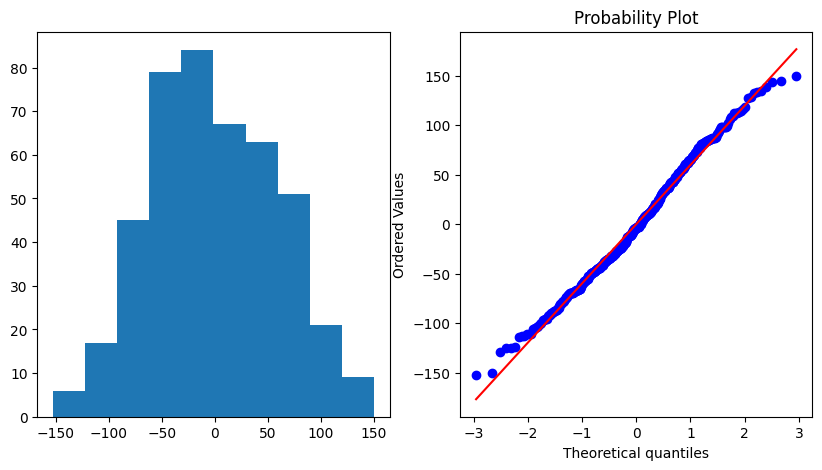

Q-Q plot을 볼 때는 잔차가 정규분포에 어느 정도 적합함을 보여주고 있다.


In [49]:
# 정규성 확인 (Histogram, Q-Q plot, Jarque-Bera)
# Jarque-Bera
#   H0: 정규분포와 차이가 없다.
#   H1: 정규분포와 차이가 있다.

from matplotlib import pyplot as plt
from statsmodels.stats.stattools import jarque_bera

stats, p, skew, kurt = jarque_bera(resid)

print('Jarque-bera: stats {:.3f}, p-value {:.3f}'.format(stats, p))
print('skewness {:.3f}, kurtosis {:.3f}'.format(skew, kurt))

print('Jarque-Bera 검정결과 유의수준 0.05를 기준으로 정규분포와는 차이가 있다.(H1)')
print('왜도, 첨도 기준으로 보더라도, 정규분포는 왜도 0, 첨도 3을 따르므로 다소 차이가 있다.')

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].hist(resid)
probplot(resid, plot=ax[1])
plt.show()

print('Q-Q plot을 볼 때는 잔차가 정규분포에 어느 정도 적합함을 보여주고 있다.')
# Probability plot은 정규분포, t분포, F분포 등 데이터가 어떤 분포를 따르는지 검정하기 위해 사용
# https://blog.naver.com/breezehome50/222339337268

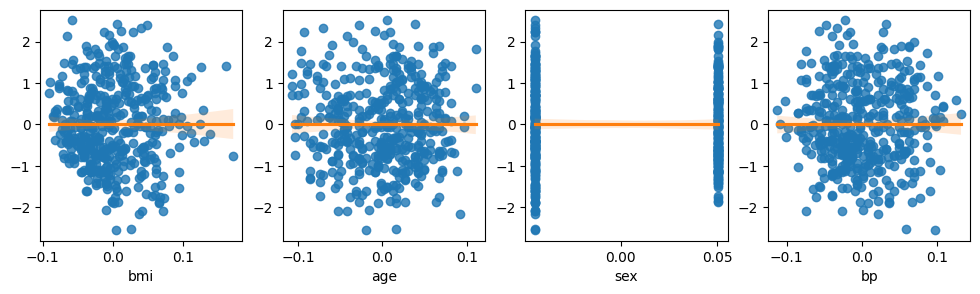

각 독립변수와 잔차의 분산이 일정하면, 가운데 회귀선이 수평하게 표시된다.
표준화 잔차의 값이 +/- 2를 벗어나면 이상값으로 예상할 수 있다.
모든 독립변수에서 잔차의 분산이 일정한 것으로 보인다


In [50]:
# 2. 등분산성 확인
import seaborn as sns
fig, ax = plt.subplots(1, 4, figsize=(12,3))
for feature, ax in zip(X.columns, ax.ravel()):
    # X축은 관측치, Y축은 각 예측치의 표준화 잔차이다.
    # 관측치가 커짐에 따라 잔차의 분산이 커지거나 작아지는 선형성을 보이면 안된다.
    sns.regplot(x=X[feature], y=sresid, line_kws={'color':'C1'}, ax=ax)
plt.show()

print('각 독립변수와 잔차의 분산이 일정하면, 가운데 회귀선이 수평하게 표시된다.')
print('표준화 잔차의 값이 +/- 2를 벗어나면 이상값으로 예상할 수 있다.')
print('모든 독립변수에서 잔차의 분산이 일정한 것으로 보인다')

In [51]:
# 3. 독립성 확인
# 잔차 간의 자기상관을 본다. 즉 잔차가 일정하게 늘어나거나 줄어드는 등의 상관을 갖는지 확인한다.
from statsmodels.stats.stattools import durbin_watson

dw = durbin_watson(resid)
print('Durbin-Watson 통계량 : {:.3f}'.format(dw))

print('통계량이 2에 가까우면 잔차간 독립 / 0에 가까우면 양의 상관 / 4에 가까우면 음의상관')

Durbin-Watson 통계량 : 1.933
통계량이 2에 가까우면 잔차간 독립 / 0에 가까우면 양의 상관 / 4에 가까우면 음의상관


### <a id='toc1_1_3_'></a>[규제 선형회귀 (Regularized linear regression)](#toc0_)
- 회귀분석은 잔차의 제곱합을 최소화하는, 최소제곱법을 통해 이루어진다.
- 따라서 다항회귀(2차함수 이상), 다중회귀(특성이 여러 개) 같은 경우, 잔차제곱을 최소화하기 위해 회귀계수가 값이 매우 커지는 양상을 보인다.
- 이 경우 표본에는 적합될 지 모르나, 모집단에는 적합되지 않는 과적합 가능성이 높아진다.
- Lasso에서는 L1 norm, 즉 회귀계수의 절대값합이 커질수록 패널티를 부여하는 방식을 취하고,
- Ridge에서는 L2 norm, 즉 회귀계수의 squared제곱합이 커질수록 패널티를 부여하는 방식을 취한다.

In [52]:
from sklearn.model_selection import train_test_split

X = diabetes[['bmi', 'age', 'sex', 'bp']]
y = diabetes['target']

X_train, X_test, y_train, y_test = train_test_split(X, y)

def reg_regression_test(X_train, X_test, y_train, y_test, model):
    train_s = model.score(X_train, y_train)
    test_s = model.score(X_test, y_test)
    print('  train score: {:.3f}  test score: {:.3f}'.format(train_s, test_s))

    for i, coef in enumerate(model.coef_.ravel()):
        print('  회귀계수 {}: {:.2f}'.format(i, coef))
    print("  절편 : {:.2f}".format(model.intercept_))

#### <a id='toc1_1_3_1_'></a>[릿지 회귀 (L2. 제곱합 규제)](#toc0_)
- 일반적으로 Ridge가 선형회귀보다 낫지만 데이터가 충분히 많아지면 차이가 줄어든다.

In [53]:
from sklearn.linear_model import Ridge
# 알파값이 클수록 규제가 커져, 모델이 일반화된다.
a = 0.9 
ridge9 = Ridge(alpha=a).fit(X_train, y_train)
reg_regression_test(X_train, X_test, y_train, y_test, ridge9)

a = 0.1 
ridge1 = Ridge(alpha=a).fit(X_train, y_train)
reg_regression_test(X_train, X_test, y_train, y_test, ridge1)


  train score: 0.340  test score: 0.247
  회귀계수 0: 402.72
  회귀계수 1: 100.48
  회귀계수 2: -25.82
  회귀계수 3: 227.60
  절편 : 152.58
  train score: 0.431  test score: 0.297
  회귀계수 0: 740.98
  회귀계수 1: 114.88
  회귀계수 2: -97.13
  회귀계수 3: 327.97
  절편 : 152.87


#### <a id='toc1_1_3_2_'></a>[라쏘 회귀 (L1. 절대값 규제)](#toc0_)
- 회귀계수가 0에 가까워지도록 규제하는데, 실제로 어떤 계수는 0이 된다. 즉 중요한 특성만 남게 된다.
- 일반적으로 Ridge가 선호되나, 특성이 너무 많을 때는 Lasso로 선택하여 특성을 줄여 해석을 용이하게 한다.

In [54]:
from sklearn.linear_model import Lasso

# 알파값이 클수록 규제가 커져, 모델이 일반화된다.
a = 0.9 
lasso9 = Lasso(alpha=a).fit(X_train, y_train)
reg_regression_test(X_train, X_test, y_train, y_test, lasso9)

a = 0.1 
lasso1 = Lasso(alpha=a).fit(X_train, y_train)
reg_regression_test(X_train, X_test, y_train, y_test, lasso1)

  train score: 0.340  test score: 0.230
  회귀계수 0: 573.90
  회귀계수 1: 0.00
  회귀계수 2: -0.00
  회귀계수 3: 59.10
  절편 : 152.62
  train score: 0.432  test score: 0.298
  회귀계수 0: 809.43
  회귀계수 1: 71.39
  회귀계수 2: -58.42
  회귀계수 3: 305.17
  절편 : 152.83


#### <a id='toc1_1_3_3_'></a>[엘라스틱 넷](#toc0_)


### <a id='toc1_1_4_'></a>[일반화 선형회귀](#toc0_)
- 종속변수가 정규분포를 따르지 않는 경우에 적용
- 종속변수의 확률분포에 따라, 선형 회귀모델 뒤에 연결함수를 선택하여 적용한다.
- 종속변수의 확률분포에 따른 표준 연결함수 (mu는 반응변수의 기대값, Xbeta는 예측변수들의 선형결합)
    - 지수분포, 감마분포 : negative inverse
    - 포아송 분포 : log --> 포아송 회귀
    - 베르누이, 다항분포 : Logit --> 로지스틱 회귀
    - 이항분포 : Logit

    - [이항분포] X~binom(x, n, p)
        - 확률 p의 베르누이 시행을 n번 시행 시 성공회수 x의 확률분포
    - [음이항분포] X~nbinom(x, k, p)
        - 확률 p의 베르누이 시행을 k번 성공 시 까지의 실패회수 x의 확률분포
    - [기하분포] X~geom(x, p)
        - 확률 p의 베르누이 시행을 첫 성공 시 까지의 시행회수 x의 확률분포
    - [초기하분포] X~Hypergeom(x, H, k, n)
        - N개의 모집단에서 K개가 성공일 때, n개 비복원 추출 시 성공회수 x의 확률분포
    - [포아송분포] X~poisson(x, lam)
        - 단위 면적/시간 당 평균 발생회수가 lam일 때, 발생회수 x의 확률분포
    - [지수분포] X~expon(x, scale=1/lam)
        - 어떤 사건 발생이 포아송분포를 따를 때, 1회 발생 시 까지의 소요시간 x의 확률분포
    - [감마분포] X~gamma(x, alpha, scale=1/lam)
        - 어떤 사건 발생이 포아송분포를 따를 때, alpha번 발생 시 까지의 소요시간 x의 확률분포

#### <a id='toc1_1_4_1_'></a>[로지스틱 회귀](#toc0_)
- 선형회귀에선느 최소제곱법을 쓰지만 로직스틱 회귀에서는 최대우도추정(MLE, Maximum likelihood estimation)을 사용
    - 예상 로그 오즈비가 관찰한 결과를 가장 잘 설명하는 모델을 찾는다.
    - 파라미터를 업데이트하고 점수를 확인(Fisher's scoring)하는 단계를 반복
    - 잔차의 특징 분석이 불가능


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from collections import Counter
import pandas as pd
import numpy as np

cancer = load_breast_cancer()
X = cancer.data[:, :4]
y = cancer.target
X_names = cancer.feature_names[:4]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)
print('target class: ', Counter(y))

target class:  Counter({1: 357, 0: 212})


In [56]:
# 파라미터 C값이 높을수록 규제가 약해지고, 모델 복잡성이 높아진다. 과적합으로 간다.
lr = LogisticRegression(C=0.01, max_iter=1000)
lr.fit(X_train, y_train)

train_score = lr.score(X_train, y_train)
test_score = lr.score(X_test, y_test)

def regress_formula(feature_names, coef, intercept):
    msg = 'y = '
    for i, feature in enumerate(feature_names):
        coef = coef.ravel()
        msg += "+ {:.3f}* '{}' ".format(coef[i], feature)
    if intercept.shape == (1,):
        intercept = intercept[0]
    else:
        intercept = intercept
    msg += '+ {:.3f}'.format(intercept)
    msg = msg[:4] + msg[6:]
    return msg

print('train score {:.3f}, test score {:.3f}\n'.format(train_score, test_score))
print('LogisticRegression Formula : \n', regress_formula(X_names, lr.coef_, lr.intercept_))

train score 0.913, test score 0.874

LogisticRegression Formula : 
 y = 0.016* 'mean radius' + -0.192* 'mean texture' + -0.272* 'mean perimeter' + 0.008* 'mean area' + 24.001


In [57]:
# XBeta값(설명변수의 선형결합)과 예측확률값 구하기

data_idx = 0    #설명변수 x0의 index

XB = (X[data_idx]*lr.coef_).sum() + lr.intercept_[0]    #회귀식에 X0값을 대입한 예측값
mu = 1/(1+np.exp(-XB))  #XB값을 변형하여 0~1 사이의 확률값으로 매핑

# method인 decision_funtion과 predict_proba로 계산하기
    # predict_proba : mu 예측 확률값 구하기
XB2 = lr.decision_function(X[data_idx].reshape(-1, len(X[data_idx])))[0]
    # decision_function : XBeta 계산
mu2 = lr.predict_proba(X[data_idx].reshape(-1, len(X[data_idx])))[0][1]

print("  {}번 데이터의 feature: {}".format(data_idx, X[data_idx]))
print('  {}번 데이터의 선형함수 값 (XBeta): {:.3f} (={:.3f})'.format(data_idx, XB, XB2))
print('  {}번 데이터의 Sigmoid함수 값 (mu): {:.3f} (={:.3f})'.format(data_idx, mu, mu2))
      

  0번 데이터의 feature: [  17.99   10.38  122.8  1001.  ]
  0번 데이터의 선형함수 값 (XBeta): -2.932 (=-2.932)
  0번 데이터의 Sigmoid함수 값 (mu): 0.051 (=0.051)


In [58]:
#기본 cut-off value(임계값)은 0.5다. 즉 확률값이 0.5 이상이면 1, 이하이면 0으로 분류
prob = lr.predict_proba(X)  # 각 클래스에 대한 예측 확률값
pred = lr.predict(X)        # 예측값

result = pd.DataFrame(prob)
result['pred'] = pred
result['y'] = y

print('분류 확률값에 따른 분류값과 실제 분류값:\n', result[:4])


분류 확률값에 따른 분류값과 실제 분류값:
           0         1  pred  y
0  0.949417  0.050583     0  0
1  0.987738  0.012262     0  0
2  0.994990  0.005010     0  0
3  0.090167  0.909833     1  0


In [59]:
# 분류 성능 최적화를 위해 cut-off value를 다르게 설정하기도 한다.
# Youden's J statistics는 기본적으로 민감도+특이도-1 이라는 매우 단순한 계산식을 통해 특이도와 민감도의 합이 최대가 되는 점을 구하는 것.
from sklearn.metrics import roc_curve
fpr, tpr, threshold = roc_curve(y, prob[:, 1])

J = tpr-fpr
idx = np.argmax(J)
best_threshold = threshold[idx]
best_tpr = tpr[idx]
best_fpr = fpr[idx]

print('최적의 cut-off value: {:.3f}'.format(best_threshold))

최적의 cut-off value: 0.526


## <a id='toc1_2_'></a>[비선형 회귀](#toc0_)

In [60]:
import pandas as pd
import numpy as np

# 데이터 생성 ----------------------------------
x = np.arange(-0.6, 6.0, 0.1)
y = 1*(x**3) + 2*(x**2) + 1*x + 3
y_noise = 30 * np.random.normal(size=x.size)
y = y + y_noise

def eval_linearRegression (x, x_trans, y):
    lr = LinearRegression()
    lr.fit(x_trans, y)
    pred = lr.predict(x_trans)
    print('sklearn R2: {:.3f}'.format(lr.score(x_trans,y)))

    #원본데이터와 예측데이터 비교
    from matplotlib import pyplot as plt
    fig, ax = plt.subplots(1,1)
    ax.scatter(x, y, alpha=0.5, color='black')
    ax.scatter(x, pred, alpha=0.5, color='red')
    ax.legend(['original', 'predict'])
    plt.show()

    # 다항회귀 적합 2 ----------------------------------
    import statsmodels.api as sm
    model = sm.OLS(y, x_trans)
    fitted = model.fit()
    print(fitted.summary())


### <a id='toc1_2_1_'></a>[다항 회귀](#toc0_)

sklearn R2: 0.893


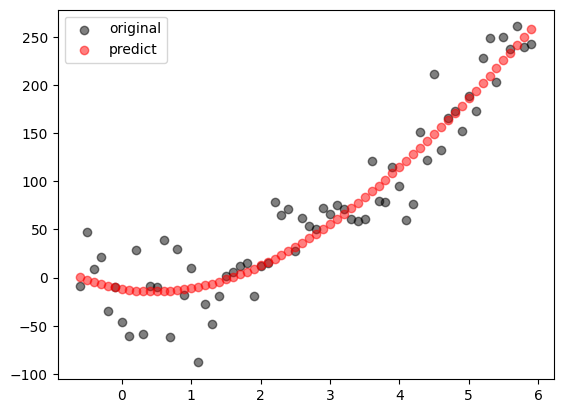

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     172.3
Date:                Sat, 09 Aug 2025   Prob (F-statistic):           5.08e-30
Time:                        09:55:11   Log-Likelihood:                -316.70
No. Observations:                  66   AIC:                             641.4
Df Residuals:                      62   BIC:                             650.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.4856      7.537     -1.524      0.1

In [61]:
# 다항회귀 적합 1 ----------------------------------
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

#degress: 다항식 차수 지정
#include_bias : 절편 추가 여부
polyfeats = PolynomialFeatures(degree=3, include_bias=True)
px = polyfeats.fit_transform(x.reshape(-1,1))

eval_linearRegression(x, px, y)

### <a id='toc1_2_2_'></a>[스플라인 회귀](#toc0_)
- 스플라인 회귀는 다항 구간들을 부드러운 곡선 형태로 적합하는 방법
- 스플라인 구간을 구분하는 값을 knot (매듭)이라고 하는데, 구간 별 다항식을 통해 knot 사이를 부드럽게 연결한다.
- scikit-learn의 SplineTransformer에서 매듭의 개수(n_knots)와 차수(degree)를 지정함으로써 기본 스플라인 항(B-spline)을 적용
- n_splines = n_knots + degree -1 (extrapolation = 'perodic'의 경우 n_knots-1)

sklearn R2: 0.899


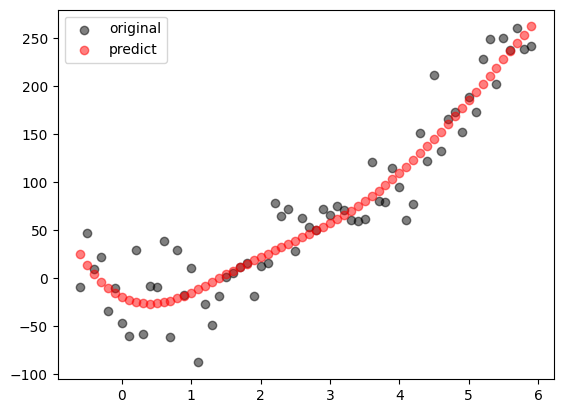

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     106.9
Date:                Sat, 09 Aug 2025   Prob (F-statistic):           1.47e-28
Time:                        09:55:12   Log-Likelihood:                -314.73
No. Observations:                  66   AIC:                             641.5
Df Residuals:                      60   BIC:                             654.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           523.9925    232.569      2.253      0.0

In [62]:
from sklearn.preprocessing import SplineTransformer
from sklearn.linear_model import LinearRegression

# 스플라인 회귀적합 1
spline = SplineTransformer(degree=3, n_knots=4)
sx = spline.fit_transform(x.reshape(-1,1))

eval_linearRegression(x, sx, y)